Based on the article:
    
**David A. Freedman (1983)<br> A Note on Screening Regression
Equations<br>The American Statistician, 37:2, 152-155**

To link to this article: http://dx.doi.org/10.1080/00031305.1983.10482729

Abstract from the paper:
    
*Consider developing a regression model in a context where substantive theory is weak. To focus on an extreme case, suppose that in fact there is no relationship between the dependent variable and the explanatory variables. Even so, if there are many explanatory variables, the R 2 will be high. If explanatory variables with small t statistics are dropped and the equation refitted, the R 2 will stay high and the overall F will become highly significant. This is demonstrated by simulation and by asymptotic calculation.*

In [1]:
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
from utils import gen_var_random, gen_var_correlated, coef_det, coef_correl

<font style='color: #76448A; font-size:120%;'>

# Paradoxes in data science
# The Freedman Paradox and the feature elimination menace

</font>

<font style='color: #76448A; font-size:120%;'>

Headline:
    
**Feature elimination is a common practice in data science, however, it entails hidden dangers that you must be aware of.**
</font>

<font style='color: #76448A; font-size:120%;'>
Behind the marvels of artificial intelligence that permeate the modern world (and the future, surely) there is a collection of algorithms and practices that constitutes the building blocks of many applications. In many cases the misuse of these procedures can lead, though, to the wrong conclusions. One of those practices is the elimination of features that are determined to be less or no useful for the task at hand.
    
</font>

<font style='color: #76448A; font-size:120%;'>
Most modern implementations of supervised machine learning involve a large number of variables. One of these variables is especial, the one that is expected to be missing in a new dataset and that could be obtained from a model using the rest of variables. This is called the target variable.  The other variables are usually called explanatory variables, as they "explain" the predicted value of the target variable. But not all variables have the same capability for explaining the target variable. So it is a common practice to perform some procedure that reduces the dimensionality of the dataset, thus gaining control over the perils of the curse of dimensionality. Feature elimination is one of the approaches to reduce dimensionality. It consists of eliminating features on the basis of their correlation with the target variable. That is, after computing the correlation of each variable with the target variable, keep only those with the highest correlation, which are the ones that better explain the target variable. The advantage of reducing the dimensionality comes from the fact that many machine learning algorithms underperform in high dimensions.
    
</font>

<font style='color: #76448A; font-size:120%;'>
The trap here is that if one looks for those correlations vehemently enough, one will eventually find them. In a paper by David Freedman from 1983, this phenomenon was formalized with both statistical and simulation approaches. Let's see how it works following the ideas of Freedman.
    
</font>

<font style='color: #76448A; font-size:120%;'>
The correlation between variables can be computed through several metrics. For two variables, the Pearson's correlation coefficient (r^2) is commonly used, which is the covariance normalized by the standard deviations of the two variables. This metrics ranges between -1 and 1, the values adopted for perfectly anticorrelated or correlated variables, respectively. For more than two variables, an equivalent definition involves a matrix. Alternatively, the coefficient of determination (R^2) is used as a scalar metric in multivariate problems. It is defined in terms of the squared sum of the residuals between the actual and the predicted values of the target variable. It is worth noticing that this definition is model dependent, so it is a measure of the correlation of all features with the target variable through a best fit model.
    
</font>

<font style='color: #76448A; font-size:120%;'>
In this scheme, when the correlation is high, the equation or model that seeks to obtain the values of the target variable will have a high predictive power and a cost function between the actual and the predicted target variables will be low. In particular, the absolute value of the R^2 coefficient will be small.
</font>

<font style='color: #76448A; font-size:120%;'>
Now, concerning the feature selection, the r^2 metric can be used in practice to sort the features according to its explanatory power.  Then we can keep the most correlated variables, usually with a rather arbitrary criterion. Another approach, used by Freedman, is the keep those variables that are _significantly_ correlated. Here some statistical theory must be used. For a given dataset and under the null hypothesis that a model fits well, the sum of squares follows an F-test distribution. Therefore it is possible to select a subset of variables that show a signifficant correlation, where the signifficance can be taken to different confidence levels. Freedman proposes to keep all variables that show a correlation which is signifficant at 25 per cent level and use them to carry out an "improved" fit of the model. He found that out of 50 variables, between 1 and 9 (for different runs) are signifficant at 5 per cent level.  On the first run, on the other hand, at most 4 variables passed this test.
The (wrong) conclusion from this experiment, is that the models seems to have a non negligible explanatory power, but remember, only random variables are involved!
</font>

Set parameters

In [31]:
Nsamples = 100
Nfeatures = 50

### <font color='red'>TASK: Define a metric for multivariate correlation</font>

Generate a fake correlation

In [32]:
X, y = gen_var_correlated(Nsamples, Nfeatures)

In [33]:
c = coef_correl(X, y)

Text(0, 0.5, 'p-value')

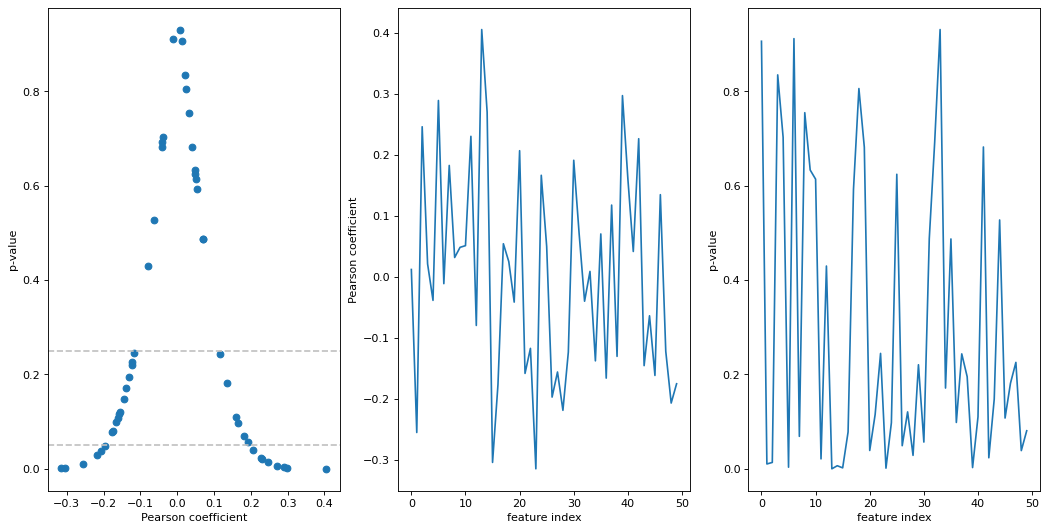

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), dpi=80)

ax[0].plot(c[:,0], c[:,1], 'o')
ax[0].axhline(0.25, linestyle='--', color='silver')
ax[0].axhline(0.05, linestyle='--', color='silver')
ax[0].set_xlabel('Pearson coefficient')
ax[0].set_ylabel('p-value')

ax[1].plot(c[:,0])
ax[1].set_xlabel('feature index')
ax[1].set_ylabel('Pearson coefficient')

ax[2].plot(c[:,1])
ax[2].set_xlabel('feature index')
ax[2].set_ylabel('p-value')

There is a distribution of values for the Pearson's correlation between the target variable and each of the independent variables.

In [35]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [36]:
coef_det(y, y_pred)

0.9985862768698838

The coefficient of determination is high because the target variable y highly dependent on the independent variables.

### <font color='red'>TASK: test correlation metric</font>

**1.- Correlation values for a highly correlated target variable**

In [37]:
X, y = gen_var_correlated(Nsamples, Nfeatures)

model.fit(X, y)
y_pred = model.predict(X)
coef_det(y, y_pred)

0.9992420225942755

In [55]:
c_cor = []
for i in range(1000):
    X, y = gen_var_correlated(Nsamples, Nfeatures)
    model.fit(X, y)
    y_pred = model.predict(X)
    c_cor.append(coef_det(y, y_pred))

**2.- Correlation values for independent variable**

In [56]:
c_ran = []
for i in range(1000):
    X, y = gen_var_random(Nsamples, Nfeatures)
    model.fit(X, y)
    y_pred = model.predict(X)
    c_ran.append(coef_det(y, y_pred))

**3.- Ignore the features**

In [57]:
c_cte = []
for i in range(1000):
    X, y = gen_var_correlated(Nsamples, Nfeatures)
    c_cte.append(coef_det(y, np.repeat(1, len(y))))

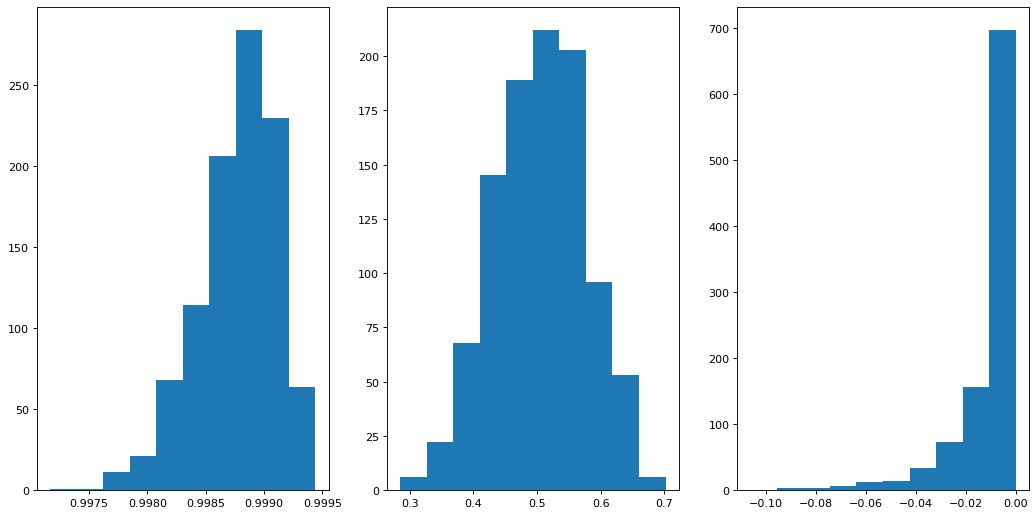

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), dpi=80)

n, b, p = ax[0].hist(c_cor)
n, b, p = ax[1].hist(c_ran)
n, b, p = ax[2].hist(c_cte)

### <font color='red'>TASK: given a set of explanatory variables, find their predictive power by eliminating the less correlated variables. Test this exercise on random variables.</font>

In [59]:
X, y = gen_var_correlated(Nsamples, Nfeatures)
c = coef_correl(X, y)

In [68]:
fltr = c[:,1] < 0.05
print(sum(fltr), len(fltr))

15 50


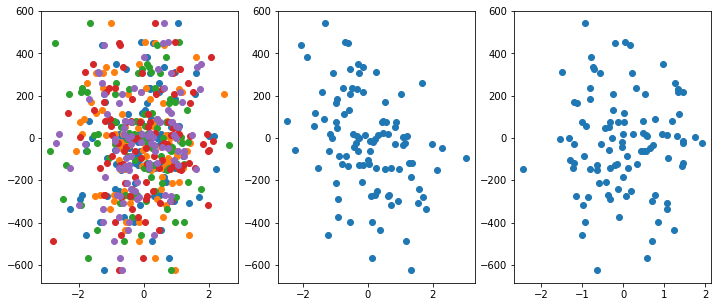

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

itop = c[:,1].argmin()
ibot = c[:,1].argmax()

for i in range(5):
    ax[0].scatter(X[:, i], y)
    
ax[1].scatter(X[:, itop], y)
ax[2].scatter(X[:, ibot], y)

<br><br>
**This is more noticeable when the sample to feature ratio is lesser**

In [ ]:
# generate random variables

Nsamples = 100
Nfeatures = 500

X, y = gen_var_correlated(Nsamples, Nfeatures)
c = coef_correl(X, y)

In [ ]:
plt.plot(c)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

for i in range(5):
    ax[0].scatter(X[:, i], y)
    
ax[1].scatter(X[:, c.argmax()], y)
ax[2].scatter(X[:, c.argmin()], y)

### <font color='red'>TASK: Compute the correlation coefficient and analyze if it improves through feature elimination</font>

Let's explore whats happens for different datasets and the corresponding subtest with feature elimination

In [ ]:
# Generate random variables

In [ ]:
Nsamples = 100
Nfeatures = 60
X, y = gen_var_random(Nsamples, Nfeatures)

In [ ]:
# Coefficient for the full sample
model.fit(X, y)
y_pred = model.predict(X)
print(coef_det(y, y_pred))

In [ ]:
plt.plot(y)
plt.plot(y_pred)

In [ ]:
plt.plot(y[y.argsort()])
plt.plot(y_pred[y.argsort()])

In [ ]:
# Coefficient for the selected subsample
R2 = coef_correl(X, y)
ids = R2.argsort()[-20:]
model.fit(X[:, ids], y)
y_pred = model.predict(X[:, ids])
print(coef_det(y, y_pred))

In [ ]:
plt.plot(R2)
plt.plot(R2[R2.argsort()])

In [ ]:
R2[R2.argsort()][-10:]

In [ ]:
Nexperiments = 100
R2_full = []
R2_subsets = []
for i in range(Nexperiments):

    X, y = gen_var_random(Nsamples, Nfeatures)
    
    # Coefficient for the full sample
    model.fit(X, y)
    y_pred = model.predict(X)
    R2_full.append(coef_det(y, y_pred))
        
    # Coefficient for the selected subsample
    R2 = coef_correl(X, y)
    ids = R2.argsort()[:20]
    model.fit(X[:, ids], y)
    y_pred = model.predict(X[:, ids])
    R2_subsets.append(coef_det(y, y_pred))

In [ ]:
print(np.min(R2_full), np.max(R2_full))
print(np.min(R2_subsets), np.max(R2_subsets))

In [ ]:
props = {'histtype': 'step', 'linewidth': 2}
plt.hist(R2_full, **props, label='full sample')
plt.hist(R2_subsets, **props, label='selected features')
plt.legend()

https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

Resources:

https://stats.stackexchange.com/questions/351200/multiple-correlation-coefficient-with-three-or-more-independent-variables

- The Advanced Theory of Statistics (vol 1) by Kendall
- An Introduction to the Theory of Statistics by Yule/Kendall.
- Mathematics of Statistics (part two) by Kenney.
- Linear Statistical Inference and Its Applications by Rao (2nd ed., page 266-268).

<font style='color: #76448A; font-size:120%;'>
The key here is that, in the words of Freedman, we are considering 'a regression model in a context where substantive theory is weak'. That is, there are no strong reasons to propose a given model. For any model, then, which is not motivated by first principles or by experience in the business, there is not a solid benchmark to test its performance. The abundance of data can supply the lack of theory, unless there is not enough data either. When the samples to features ratio is low, there is plenty of room to play with the features and the results can easily be bended by picking the right subset of features.  This is a bad thing, but eliminating features without knowing these dangers, is certainly bad also.
    
</font>